In [2]:
import dicom
import os
import array

import matplotlib.pyplot as plt

import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
%matplotlib inline



In [7]:
study='rita'
#rp=dicom.read_file('/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/patient/GARCIA/dicom/RP.201706229.OrificeInfTTT.dcm')
rp=dicom.read_file('/media/sf_Downloads/RP.201808212.RA_STECVerte3.dcm')

In [8]:
iso=[]
for val in rp.BeamSequence[0].ControlPointSequence[0].IsocenterPosition: iso.append(float(val))
study=str(str(rp.PatientName).split('^')[0])
print(study)
print(iso)


DAO
[2.1303787e-14, 2.1303787e-14, 0.0]


In [9]:
def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice], cmap=plt.cm.gray)
    interact(plot_image, myslice=(0, im.shape[0]))
    return; 
def ct_crop(pix, x1crop, x2cropt, y1crop, y2cropt):
    print('ORIGINAL :')
    ct_viewer(pix)
    x2crop=x2cropt-pix.shape[2]
    y2crop=y2cropt-pix.shape[1]
    pix_crop=pixel_array[:, y1crop:y2crop, x1crop:x2crop]
    print('CROPPED :')
    ct_viewer(pix_crop)
    return pix_crop;

In [126]:
#read dcm directory and compte ONE sitk 3D image object
reader=sitk.ImageSeriesReader()
#dicom_name=reader.GetGDCMSeriesFileNames('scanX/')
dicom_name=reader.GetGDCMSeriesFileNames('/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/patient/'+study+'/dicom/ct/')
dicom_name=reader.GetGDCMSeriesFileNames('/media/sf_Downloads/CT_Flora')
dicom_name=reader.GetGDCMSeriesFileNames('/home/gate/Documents/phd/work/qt/GateForTB/patient/NOUZILLE/ct')
reader.SetFileNames(dicom_name)
ct_image = reader.Execute()

print(ct_image.GetOrigin())
print(ct_image.GetDirection())
dicom_ct_dimension=ct_image.GetSize()
dicom_ct_pixel_size=ct_image.GetSpacing()
print('Dimesions : ' , dicom_ct_dimension)
print('Pixels Size :' , dicom_ct_pixel_size)

pixel_array=sitk.GetArrayFromImage(ct_image)   #Get numpy n-d array from sitk object to plot it                          
ct_viewer(pixel_array)

(-250.0, -250.0, -178.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Dimesions :  (512, 512, 137)
Pixels Size : (0.976562, 0.976562, 2.5)


interactive(children=(IntSlider(value=68, description='myslice', max=137), Output()), _dom_classes=('widget-in…

(137, 512, 512)
(512, 512)


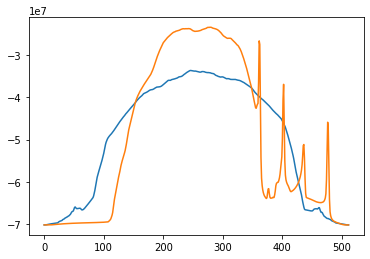

In [127]:
print(pixel_array.shape)
temp_cum_array = np.zeros((pixel_array.shape[1], pixel_array.shape[2]))


a= pixel_array.sum(axis=0)
print(a.shape)

x=a.sum(axis=0)
y=a.sum(axis=1)
plt.plot(x)
plt.plot(y)
#trace = go.Scatter(
#    x=np.arange(pixel_array.shape[1]),
#    y=energy)
#data=[trace]
#py.iplot(data, filename='energy spectrum')

In [128]:

x=x-min(x)
y=y-min(y)

for i in range(int(pixel_array.shape[1]/2), 0, -1):
    if x[i] < max(x)*0.12:
        print(i)
        x1auto=i
        break      
for i in range(int(pixel_array.shape[1]/2), int(pixel_array.shape[1]), 1):
    if x[i] < max(x)*0.12:
        print(i)
        x2auto=i
        break       
for i in range(int(pixel_array.shape[2]/2), 0, -1):
    if y[i] < max(y)*0.12:
        print(i)
        y1auto=i
        break      
for i in range(int(pixel_array.shape[2]/2), int(pixel_array.shape[2]), 1):
    if y[i] < max(y)*0.12:
        print(i)
        y2auto=i
        break

70
436
117
455


In [18]:
# write raw original ct
#pixel_array=pixel_array[::-1,::,:]
#sitk.WriteImage(ct_image, study+'/images/'+study+'_original.mhd')
#sitk.WriteImage(ct_image, '/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/patient/'+study+'/images/'+study+'_original.mhd')
sitk.WriteImage(ct_image, '/media/sf_Downloads/'+study+'_original.mhd')

In [129]:
#select apropriates value to crop scan 
#use sliders to view all the slice and refer to original ct
x1=x1auto  #   X axis lower value (on original ct)
x2=x2auto #   X axis upper value (on original ct)
y1=y1auto #   Y axis lower value (on original ct)
y2=y2auto #   Y axis upper value (on original ct)
pixel_array_crop=ct_crop(pixel_array, x1, x2, y1, y2);

ORIGINAL :


interactive(children=(IntSlider(value=68, description='myslice', max=137), Output()), _dom_classes=('widget-in…

CROPPED :


interactive(children=(IntSlider(value=68, description='myslice', max=137), Output()), _dom_classes=('widget-in…

In [23]:
ct_viewer(pixel_array_crop)

ct_crop=sitk.GetImageFromArray(pixel_array_crop)

print(ct_crop.GetSize())

crop_val=[x1, y1, 0]
new_origin=[]

for val1, cropval, space in zip(ct_image.GetOrigin(),crop_val , ct_image.GetSpacing()):
    new_origin.append(val1+(cropval*space))

#for gate simulation frame
new_origin[1]=new_origin[1]*-1
new_origin[2]=new_origin[2]*-1

print(new_origin)

ct_crop.SetOrigin(new_origin)
ct_crop.SetSpacing(ct_image.GetSpacing())

#sitk.WriteImage(ct_crop, '/home/gate/Documents/phd/work/gateTrueBeamModel/tb/fullCreator/patient/'+study+'/images/'+study+'.mhd')
sitk.WriteImage(ct_crop, '/media/sf_Downloads/'+study+'.mhd')

interactive(children=(IntSlider(value=43, description='myslice', max=86), Output()), _dom_classes=('widget-int…

(220, 371, 86)
[-103.51569999999998, 113.28132, 127.5]
